# A Study of Github Developer Programming Languages and Technologies

An analysis of the popularity of programming languages and technologies among Github developers.

Author: Mark Richards

Email: mark.thomas.richards@outlook.com

Data Souce: dataset created by Jaime Valero, available at https://www.kaggle.com/datasets/jaimevalero/developers-and-programming-languages, and seems to be based on a dataset https://www.kaggle.com/datasets/chasewillden/topstarredopensourceprojects created by Chase Wilden.

Data Source License: CC0: Public Domain


In [146]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
plt.style.use("seaborn-darkgrid")

In [51]:
df_github = pd.read_csv("user-languages.csv")

## Data Set

The data is taken from the 1000 most starred repositories on Github (at some point in 2017). Each row represents a user who starred at least one of the repos (taken from the first 30 users who starred each repo) and then each column is a programming language or technology used in the starred repos.

For each row, where a column contains a non-zero value it indicates that the user starred a repo which uses that language/technology and the value represents the relative frequency (for that user) of that lang/tech over all the repos the user has starred.

I chose this dataset precisely because it is very wide data in a somewhat odd format: I don't believe it is a good data source, I just wanted to see what we could get out of it.

## Business Task

We want to identify the __most popular programming languages and technologies__ used in repositories starred by users. 

## Cleaning

Lets have a look at the data. 

In [103]:
df_github.info()
df_github.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17461 entries, 0 to 17460
Columns: 1411 entries, user_id to zsh-configuration
dtypes: float64(1320), int64(90), object(1)
memory usage: 188.0+ MB


,user_id,assembly,batchfile,c,c#,c++,clojure,coffeescript,css,elixir,...,yeoman-generator,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration
0,007lva,0.0,0.0,0.0,0.0000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,06wj,0.0,0.0,0.0,0.0171,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bserver07,0.0,0.0,0.0,0.0000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0rca,0.0,0.0,0.0,0.0000,0.00000,0.252336,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x00A,0.0,0.0,0.0,0.0000,0.10231,0.000000,0.0,0.005776,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets start by checking for __missing values__.

In [104]:
df_github.isna().sum()

user_id               0
assembly              0
batchfile             0
c                     0
c#                    0
                     ..
zero-configuration    0
zeromq                0
zookeeper             0
zsh                   0
zsh-configuration     0
Length: 1411, dtype: int64

And there are none. 

Only one column is non-numeric (the user id). The rest are mostly the float64 we would expect, but we do have some __int64__ values, which I'm guessing indicates some users have only starred repos with one technology (so that their relative frequency would be 1). We can check that:

In [59]:
df_github[df_github.isin([1]).any(axis=1)]

,user_id,assembly,batchfile,c,c#,c++,clojure,coffeescript,css,elixir,...,yeoman-generator,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration
51,2p0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,a7mdAli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,aandreecarvalho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,abigdreamer,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,abrussak,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16940,yaowenbin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17075,youlomg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17153,yveslaroche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17179,ZacharyCoumont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And this seems to be the case.

We need to check that all the values themselves are in the __expected range__ (0 to 1).

In [94]:
(df_github
     .max(numeric_only=True)
     .sort_values()
    )

psr-13         0.0
pymc           0.0
deep-io        0.0
pty            0.0
psr-16         0.0
              ... 
wechat         1.0
scala          1.0
tools          1.0
open-source    1.0
python         1.0
Length: 1410, dtype: float64

They are.

And we should also __check that each rows values sum to 1__, since they are supposed to be relative frequencies.

In [92]:
(df_github
     .sum(axis=1, numeric_only=True)
     .sort_values()
    )

6586     0.0
9543     0.0
4094     0.0
5913     0.0
13280    0.0
        ... 
10224    1.0
16626    1.0
8758     1.0
8991     1.0
11938    1.0
Length: 17461, dtype: float64

We seem to have some rows which sum to zero. Lets see how many.

In [161]:
df_github_zeros = (df_github
    .assign(sum_total=df_github.sum(axis=1, numeric_only=True))
    .query("sum_total == 0")
    )

df_github_zeros

,user_id,assembly,batchfile,c,c#,c++,clojure,coffeescript,css,elixir,...,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration,sum_total
48,2gua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
693,AllianceDarkSylinc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1178,ARoiD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1484,badyqb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1917,blanco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16789,xiaxucn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17056,YongZhangrush,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17135,yurlin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17226,zchflyer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So there are 70 rows containing only zeros. We should drop these when cleaning.

Lets also check for duplicates.

In [106]:
df_github.duplicated().sum()

0

And no duplicates.

So with respect to cleaning we just need to drop the 70 rows containing only zero.

In [113]:
def github_cleaning(df):
    return(
        df
        .drop(list(df_github_zeros.index), axis=0)
        .reset_index()
        .drop("index", axis=1)
    )

df_github_clean = github_cleaning(df_github)

In [114]:
df_github_clean

,user_id,assembly,batchfile,c,c#,c++,clojure,coffeescript,css,elixir,...,yeoman-generator,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration
0,007lva,0.0,0.0,0.00000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,06wj,0.0,0.0,0.00000,0.0171,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bserver07,0.0,0.0,0.00000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0rca,0.0,0.0,0.00000,0.0000,0.00000,0.252336,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x00A,0.0,0.0,0.00000,0.0000,0.10231,0.000000,0.000000,0.005776,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17386,zztczcx,0.0,0.0,0.00000,0.0000,0.00000,0.000000,0.008032,0.062249,0.138554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17387,zzuwangfeng,0.0,0.0,0.00000,0.0000,0.00000,0.000000,0.000000,0.008353,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17388,zzz40500,0.0,0.0,0.00000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17389,zzzhc,0.0,0.0,0.04086,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analysis

The format of the data is awkward. We can __transpose__ it so that the rows represent the technologies and the columns the users.

In [162]:
# transpose
df_github_clean_t = (
    df_github_clean
    .T
    )

# set the user names to be the column names
df_github_clean_t.columns = df_github_clean_t.iloc[0]

# drop the duplicated user name row
df_github_clean_t = df_github_clean_t.iloc[1:]

df_github_clean_t

user_id,007lva,06wj,0bserver07,0rca,0x00A,0x414c,0xabad1dea,0xBADC0FFEE,0xced,0xdco,...,zx1986,zxm9988,zygote,zymxxx,zywj,zztczcx,zzuwangfeng,zzz40500,zzzhc,zzzhoukang
assembly,0.0,0.0,0.0,0.0,0.0,0.0,0.182353,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
batchfile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0,0.0,0.006744,0.064706,0.0,0.027089,0.0,...,0.0,0.0,0.0,0.039344,0.018713,0.0,0.0,0.0,0.04086,0.0
c#,0.0,0.0171,0.0,0.0,0.0,0.025048,0.0,0.0,0.0,0.0,...,0.016794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c++,0.0,0.0,0.0,0.0,0.10231,0.11368,0.0,0.0,0.000576,0.0,...,0.0,0.0,0.0,0.0,0.003509,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero-configuration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zeromq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zookeeper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zsh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can calculate a __popularity metric__ for each language/technology by taking the mean of each row.

In [163]:
df_github_clean_t_mean = (
    df_github_clean_t
    .assign(mean_perc=df_github_clean_t.mean(axis=1))
    .sort_values("mean_perc", ascending=False)
    .loc[:, "mean_perc"]
    )

In [140]:
df_github_clean_t_mean.head(10)

javascript    0.109321
python        0.042950
ruby          0.034128
java          0.028648
html          0.018788
css           0.018027
php           0.017355
shell         0.016477
simple        0.015995
library       0.015784
Name: mean_perc, dtype: float64

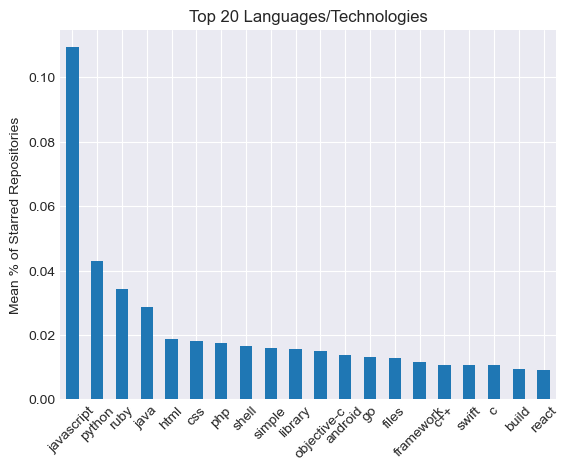

In [164]:
ch_bar_df_github_clean_t_mean = (df_github_clean_t_mean
    .head(20)
    .plot(
        kind="bar",
        rot=45,
        title="Top 20 Languages/Technologies",
        ylabel="Mean % of Starred Repositories"
        )
    )

We see approximately what we might expect: javascript, python, ruby, java, html, css, etc. 

Again, I don't think this is accurate enough data to make any kind of genuine ranking on (what on earth does "simple", "library" or "files" actually refer to...?). This is just an exercise.